# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

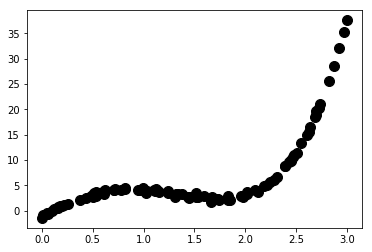

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [6]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [7]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([17.59261303, 14.37577329, -0.37026663,  0.6254252 , -0.34730461,
       -0.29591623,  3.23101674, -0.33277333, -0.04304874,  0.99297165,
       13.54411521,  1.78609748,  0.8909477 , -0.16766525,  2.5075138 ,
       17.38079622, -0.09303092,  6.53152727, -0.17385235, 11.53905406,
        1.39576355,  3.15648754,  2.0468273 ,  9.98236239, 19.42673119,
        0.08414115, -0.14653354, 14.42143055,  3.38270704,  0.20135915,
       -0.31283562, -0.27843523,  3.56412295, 10.44113357, 25.13772622,
       18.89854252, -0.30603414,  9.51500607,  1.86847596,  3.71144474])

In [8]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.7063601708289593
Explained variance score: 0.7063601708289593
Median absolute error: 3.821211438854471
Mean squared error: 13.681614331361487
Mean absolute errors: 3.2193152205371214


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics
from sklearn import datasets, linear_model

def calculate_metrics(degree, model):
    print("Regression degree: {}".format(degree))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

In [21]:
degrees = (1, 2, 3, 4, 5, 25)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X_train, y_train)
    calculate_metrics(degree, model)
    print("\n")

Regression degree: 1
Explained variance score: 0.515525577674294
Explained variance score: 0.515525577674294
Median absolute error: 2.8215070933986865
Mean squared error: 21.667245506014943
Mean absolute errors: 3.461888330336072


Regression degree: 2
Explained variance score: 0.7063601708289593
Explained variance score: 0.7063601708289593
Median absolute error: 3.821211438854471
Mean squared error: 13.681614331361487
Mean absolute errors: 3.2193152205371214


Regression degree: 3
Explained variance score: 0.987234665158354
Explained variance score: 0.987234665158354
Median absolute error: 0.5947121766883186
Mean squared error: 0.5829039058754272
Mean absolute errors: 0.660078498534911


Regression degree: 4
Explained variance score: 0.9988698240021138
Explained variance score: 0.9988698240021138
Median absolute error: 0.14091146414454725
Mean squared error: 0.05255776354632201
Mean absolute errors: 0.18415294955946124


Regression degree: 5
Explained variance score: 0.998750413301891